### Fine-tuned PorousAI FinBERT Model

#### I. Fine-tuning Process

In [ ]:
senti_ProsusAI_fin_bert = BertForSequenceClassification.from_pretrained('ProsusAI/finbert', num_labels=3)
senti_ProsusAI_fin_tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--ProsusAI--finbert/snapshots/54bddcea2cca580dd1df6a88d33242dcf4c61a71/config.json
Model config BertConfig {
  "_name_or_path": "/home/ubuntu/finbert/models/language_model/finbertTRC2",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "positive",
    "1": "negative",
    "2": "neutral"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 1,
    "neutral": 2,
    "positive": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "us

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--ProsusAI--finbert/snapshots/54bddcea2cca580dd1df6a88d33242dcf4c61a71/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at ProsusAI/finbert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--ProsusAI--finbert/snapshots/54bddcea2cca580dd1df6a88d33242dcf4c61a71/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--ProsusAI--finbert/snapshots/54bddcea2cca580dd1df6a88d33242dcf4c61a71/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--ProsusAI--finbert/snapshots/54bddcea2cca580dd1df6a88d33242dcf4c61a71/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--ProsusAI--finbert/snapshots/54bddcea2cca580dd1df6a88d33242dcf4c61a71/config.json
Model config BertConfig {
  "_name_or_path": "ProsusAI/finbert",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dro

In [ ]:
dataset_train = Dataset.from_pandas(df_train1)
dataset_val = Dataset.from_pandas(df_val1)
dataset_test = Dataset.from_pandas(df_test1)

dataset_train = dataset_train.map(lambda e: senti_ProsusAI_fin_tokenizer(e['News_Headline'], truncation=True, padding='max_length', max_length=512), batched=True)
dataset_val = dataset_val.map(lambda e: senti_ProsusAI_fin_tokenizer(e['News_Headline'], truncation=True, padding='max_length', max_length=512), batched=True)
dataset_test = dataset_test.map(lambda e: senti_ProsusAI_fin_tokenizer(e['News_Headline'], truncation=True, padding='max_length' , max_length=512), batched=True)

dataset_train.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_val.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_test.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'f1_score' : f1_score(predictions, labels, average='micro')}

args = TrainingArguments(
        output_dir='temp/',
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        num_train_epochs=5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='f1_score',
)

trainer = Trainer(
        model=senti_ProsusAI_fin_bert,       # the instantiated 🤗 Transformers model to be trained
        args=args,                           # training arguments, defined above
        train_dataset=dataset_train,         # training dataset
        eval_dataset=dataset_val,            # evaluation dataset
        compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3924
  Num Epochs = 5
  Instantaneous 

Epoch,Training Loss,Validation Loss,F1 Score
1,No log,0.273604,0.894737
2,No log,0.285005,0.899314
3,No log,0.349789,0.903890
4,No log,0.404191,0.892449
5,0.149100,0.417629,0.899314


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 437
  Batch size = 32
Saving model checkpoint to temp/checkpoint-123
Configuration saved in temp/checkpoint-123/config.json
Model weights saved in temp/checkpoint-123/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 437
  Batch size = 32
Saving model checkpoint to temp/checkpoint-246
Configuration saved in

TrainOutput(global_step=615, training_loss=0.12620857246522982, metrics={'train_runtime': 469.0357, 'train_samples_per_second': 41.831, 'train_steps_per_second': 1.311, 'total_flos': 5162285255823360.0, 'train_loss': 0.12620857246522982, 'epoch': 5.0})

In [ ]:
senti_ProsusAI_fin_bert.eval()
trainer.predict(dataset_test).metrics

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 485
  Batch size = 32


{'test_loss': 0.37411874532699585,
 'test_f1_score': 0.8969072164948453,
 'test_runtime': 3.5335,
 'test_samples_per_second': 137.257,
 'test_steps_per_second': 4.528}

In [ ]:
trainer.save_model('PorousAI_finbert_fine_tuned_1')

Saving model checkpoint to PorousAI_finbert_fine_tuned_1
Configuration saved in PorousAI_finbert_fine_tuned_1/config.json
Model weights saved in PorousAI_finbert_fine_tuned_1/pytorch_model.bin


#### II. Evaluate the Fine-tuned PorousAI FinBERT Model

In [ ]:
tuned_PorousAI_model = BertForSequenceClassification.from_pretrained('PorousAI_finbert_fine_tuned_1')
senti_ProsusAI_fin_tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

loading configuration file PorousAI_finbert_fine_tuned_1/config.json
Model config BertConfig {
  "_name_or_path": "ProsusAI/finbert",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "positive",
    "1": "negative",
    "2": "neutral"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 1,
    "neutral": 2,
    "positive": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file P

In [ ]:
tuned_PorousAI_model.config.id2label

{0: 'positive', 1: 'negative', 2: 'neutral'}

In [ ]:
neutral = list()
positive = list()
negative = list()
for i in range(len(test_set)):
  inputs = senti_ProsusAI_fin_tokenizer(test_set.iloc[i, 0], padding=True, truncation=True, max_length=512, return_tensors='pt') #tokenize text to be sent to model
  outputs = tuned_PorousAI_model(**inputs)
  predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
  positive.append(predictions[0][0].tolist())
  negative.append(predictions[0][1].tolist())
  neutral.append(predictions[0][2].tolist())

In [ ]:
df_array = np.array(test_set)
df_list = list(df_array[:, 0])
table = {'News_Headline':df_list, "Positive":positive, "Negative":negative, "Neutral":neutral}      
result_ProsusAI_fin_BERT = pd.DataFrame(table, columns=["News_Headline", "Positive", "Negative", "Neutral"])
result_ProsusAI_fin_BERT['Prediction'] = result_ProsusAI_fin_BERT[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)
result_ProsusAI_fin_BERT['label'] = test_set['label'].copy()
result_ProsusAI_fin_BERT

,News_Headline,Positive,Negative,Neutral,Prediction,label
0,"Of this , EUR 38.8 mn was net interest income .",0.000967,0.002219,0.996814,Neutral,Neutral
1,The government has instead proposed an exchang...,0.001302,0.000837,0.997861,Neutral,Neutral
2,"Nordea Pankki Suomi Oyj , according to previou...",0.013875,0.000983,0.985142,Neutral,Neutral
3,Under the agreement GeoSentric will provide Gy...,0.928530,0.000924,0.070546,Positive,Positive
4,Both operating profit and turnover for the six...,0.993048,0.004651,0.002301,Positive,Positive
...,...,...,...,...,...,...
917,"Finnish Suominen Flexible Packaging Ltd , owne...",0.002152,0.978578,0.019270,Negative,Negative
918,"Alma Media holds 70 % of this company , the re...",0.001033,0.000928,0.998039,Neutral,Neutral
919,Less than ten people will face pension agreeme...,0.000750,0.005180,0.994069,Neutral,Neutral
920,"Purchase it for the 12MP snapper , if nothing ...",0.001903,0.001477,0.996620,Neutral,Neutral


              precision    recall  f1-score   support

    Negative       0.95      1.00      0.97       115
     Neutral       0.99      0.97      0.98       548
    Positive       0.97      0.97      0.97       259

    accuracy                           0.98       922
   macro avg       0.97      0.98      0.97       922
weighted avg       0.98      0.98      0.98       922



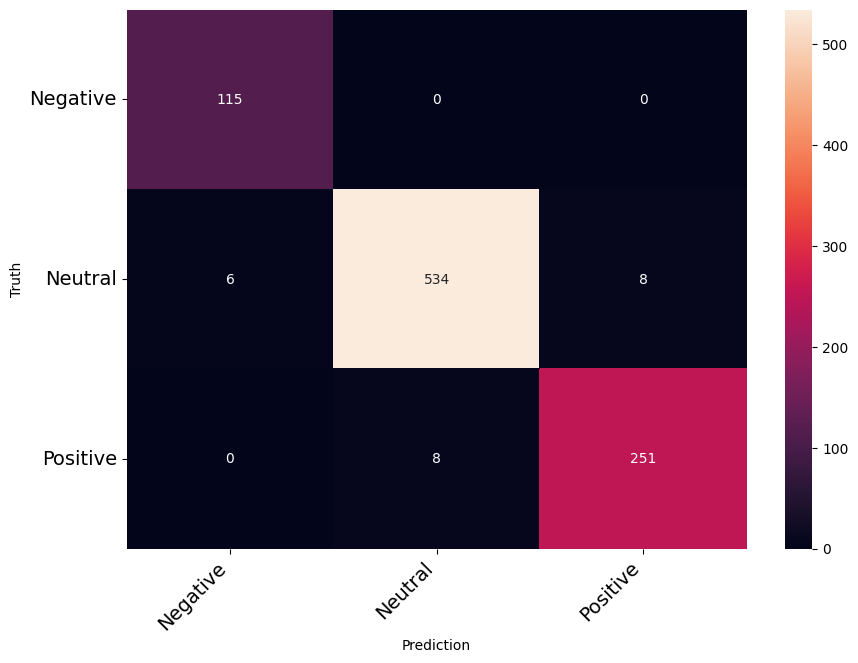

In [ ]:
print(classification_report(result_ProsusAI_fin_BERT['label'], result_ProsusAI_fin_BERT['Prediction']))
print_confusion_matrix(confusion_matrix(result_ProsusAI_fin_BERT['label'], result_ProsusAI_fin_BERT['Prediction']), ['Negative', 'Neutral', 'Positive'])

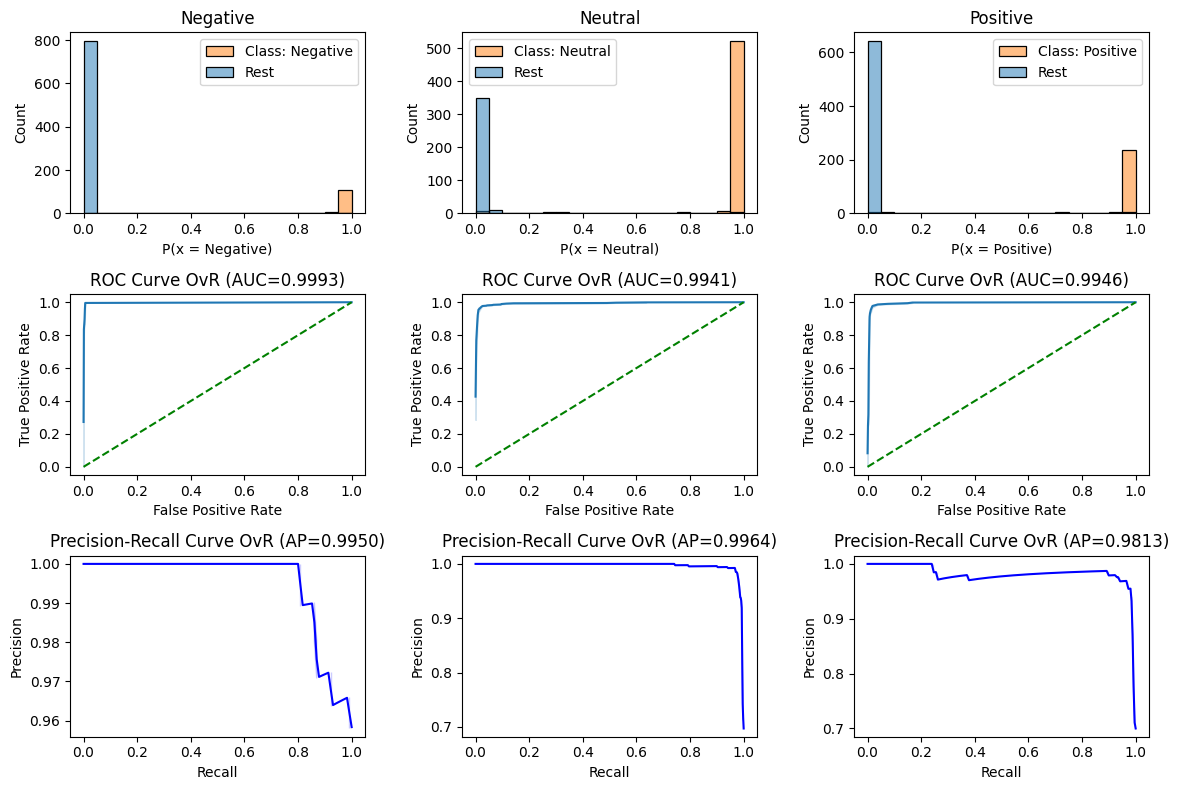

In [ ]:
plot_roc_pr_ovr(result_ProsusAI_fin_BERT)